<br><img width="480" src="https://yt3.ggpht.com/ytc/AKedOLR4nocA0gcnB83XTYz1jpnL2aHJIFj5vbCNlJ4L=s900-c-k-c0x00ffffff-no-rj">
<hr style="border: 10px solid green;" />

## <span style="color:green">Финальный комментарий<span>
Спасибо за проделанную работу🤝

Ержан, спасибо за доработки, всё принято👌
    
Желаю дальнейших успехов и отличного настроения🖐

Поздравляю, проект принят👍

<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Ержан, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на _ТЫ_ . Если это неприемлемо, обязательно напиши мне в комментариях - мы перейдем на _ВЫ_ .

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа ✅</b><br>
    Безупречная работа</div>       
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить ⚠️</b><br>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить. Несколько таких комментариев допустимы, но более - придется некоторые доработать. Большое кол-во мелких замечаний и помарок сказываются на общем впечатлении от работы.</div>   
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать ⛔️</b><br>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.</div>
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге - основные цели в диалоге:
- обмен опытом (да я тоже учусь у студентов👨‍🎓)
- выполнить проект еще лучше
- помочь тебе стать аналитиком

Поэтому чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их. 
    
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Например, вот так.</div>
   
Поехали! :)

<hr style="border: 2px solid green;" />

## Цель: сколько покупателей доходят до этапа покупки

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить ⚠️</b><br>
Хорошая практика - когда проект в начале содержит:
<ul>
    <li> общее описание проблемы\задачи
    <li> описание данных
    <li> План или примерные шаги на пути решения задач</ul>
Это поможет как тебе (при возвращении к проекту) быстро вспомнить, читающему результат понимать о чем идет речь. Надеюсь это правило ты сохранишь до конца учебы и далее🖐</div><br>

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import math as mth
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 9)})
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/logs_exp.csv', delimiter='\t')

In [3]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
df.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

### Шаг 2. Подготовьте данные

In [6]:
df.columns.tolist()

['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId']

In [7]:
df.columns = ['event_name', 'user_id', 'event_timestamp', 'exp_id']

In [8]:
df.head()

,event_name,user_id,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [9]:
df = df.drop_duplicates().reset_index(drop=True)
df

,event_name,user_id,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,247
243709,MainScreenAppear,5849806612437486590,1565212439,246
243710,MainScreenAppear,5746969938801999050,1565212483,246
243711,MainScreenAppear,5746969938801999050,1565212498,246


In [10]:
df.duplicated().sum()

0

In [11]:
df['date_time'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['date'] = df['date_time'].astype('datetime64[D]')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
event_name         243713 non-null object
user_id            243713 non-null int64
event_timestamp    243713 non-null int64
exp_id             243713 non-null int64
date_time          243713 non-null datetime64[ns]
date               243713 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Обзор данных выполнен хорошо!</div> <br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
Дополнительно по данным АВ теста можно проверить:
<ul>
    <li> Пересечение пользователей - может быть есть те, кто попал в обе группы? Удалять таких пользователей не надо, достаточно проверить</ul></div> <br>

### Шаг 3. Изучите и проверьте данные

#### Сколько всего событий в логе?

In [13]:
print('Всего событий %d, типов событий %d' % (df.shape[0], df['event_name'].nunique()))

Всего событий 243713, типов событий 5


#### Сколько всего пользователей в логе?

In [14]:
print('Всего пользователей в логе %d' % (df['user_id'].nunique()))

Всего пользователей в логе 7551


#### Сколько в среднем событий приходится на пользователя?

In [15]:
print('В среднем событий на пользователя %d' % (df.shape[0] / df['user_id'].nunique()))

В среднем событий на пользователя 32


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
Предыдущие проекты и теория показывали, что есть случаи, когда оценка среднего с помощью простого среднего арифметического может быть некорректной.</div> <br>

#### Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?

In [16]:
np.ptp(df['event_timestamp'].to_numpy())

1182701

In [17]:
delta_time = pd.to_timedelta(1182701, unit='s')

In [18]:
firts_date = df['date_time'].min()
last_date = df['date_time'].max()

In [19]:
print('Данные от %s до %s, разница в %s' % (firts_date, last_date, delta_time))

Данные от 2019-07-25 04:43:36 до 2019-08-07 21:15:17, разница в 13 days 16:31:41


In [20]:
df.head()

,event_name,user_id,event_timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [21]:
temp = df.groupby(by='date').agg({'event_name': 'count'}).reset_index()
temp['percent'] = temp['event_name'] / temp['event_name'].sum() * 100
temp['cum_sum'] = temp['percent'].cumsum()
temp

,date,event_name,percent,cum_sum
0,2019-07-25,9,0.003693,0.003693
1,2019-07-26,31,0.012720,0.016413
2,2019-07-27,55,0.022568,0.038980
3,2019-07-28,105,0.043083,0.082064
4,2019-07-29,184,0.075499,0.157562
5,2019-07-30,412,0.169051,0.326614
6,2019-07-31,2030,0.832947,1.159561
7,2019-08-01,36141,14.829328,15.988889
8,2019-08-02,35554,14.588471,30.577359
9,2019-08-03,33282,13.656227,44.233586


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


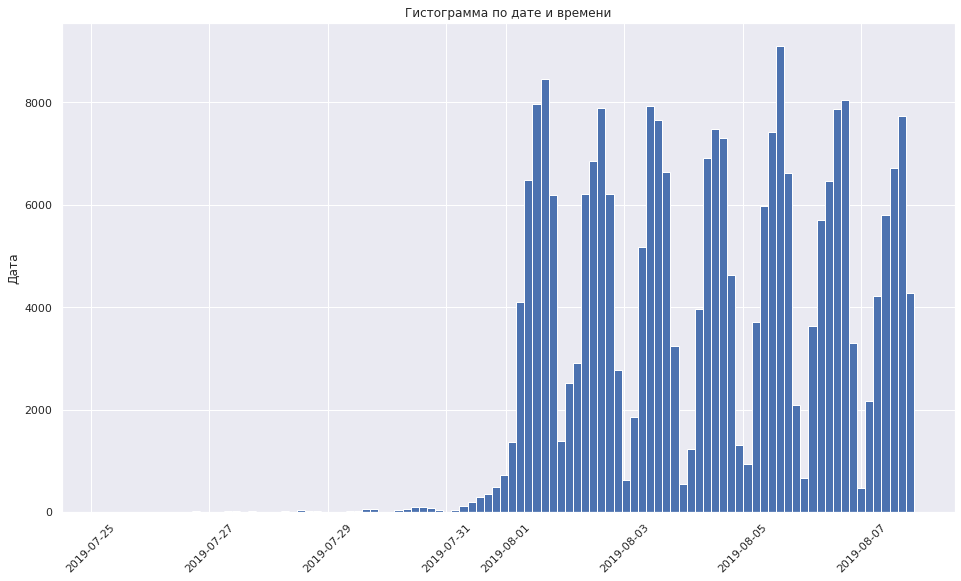

In [22]:
ax = df['date_time'].hist(bins=100)
plt.title('Гистограмма по дате и времени')
plt.ylabel("Частота")
plt.ylabel("Дата")
plt.xticks(rotation=45)
plt.show()

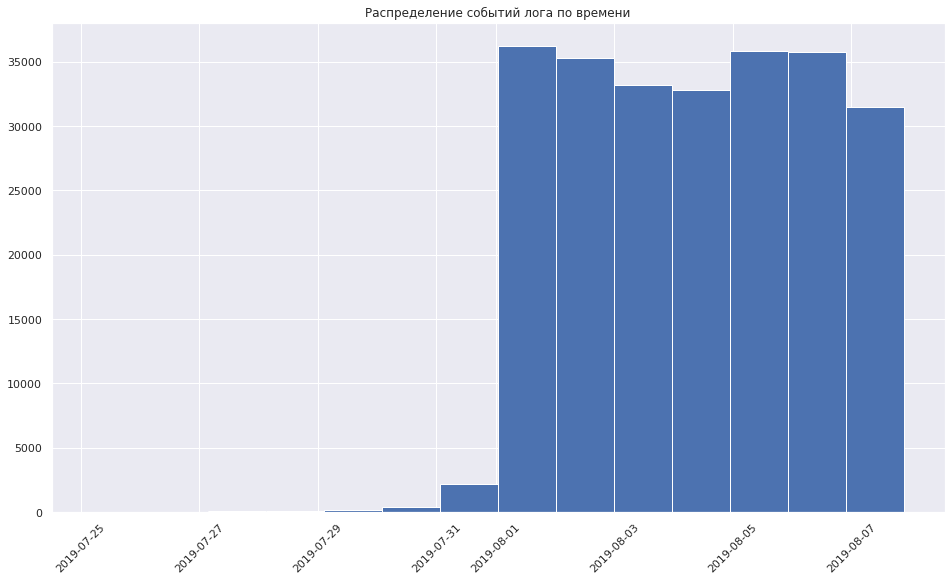

In [23]:
df['date_time'].hist(bins=14) # логи за 14 дней
plt.xticks(rotation=45)
plt.title('Распределение событий лога по времени');

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Поменял график, проверьте</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>Да, так верно👍</div> 

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
<b>Метод hist</b> - Каждый метод рассчитан на использование только для того, для чего его придумали. Метод <code>hist</code> необходим для построения гистограмм или плотностей распределения. <code>Гистограмма строится следующим образом. Сначала множество значений, которое может принимать элемент выборки, разбивается на несколько интервалов (bins). Чаще всего эти интервалы берут одинаковыми, но это не является строгим требованием. Эти интервалы откладываются на горизонтальной оси, затем над каждым рисуется прямоугольник, высота прямоугольника пропорциональна числу элементов выборки, попадающих в соответствующий интервал.</code> Да, с помощью метода <code>hist</code> можно построить разные зависимости, но тогда надо понимать суть этого метода иначе получается ерунда. Когда мы хотим построить линейный график по времени, у нас есть однозначное кол-во значений по оси Х (5, 12, 21 и тд...). Именно для этого при построениях указывают значения по обеим осям (<code>plt.plot(X_values, Y_values)</code>). При иcпользовании метода <code>hist</code> необходимо чтобы было соответствие параметра <code>bins</code> числу значений по оси Х, иначе получаемый график будет искаженным. Рекомендую для каждого случая использовать подходящий метод, для гистограммы - <code>plt.hist\sns.distplot\...</code>, для линейных графиков - <code>plt.plot\px.scatter\sns.lineplot</code>.</div><br>

In [24]:
df_clean = df.loc[df['date'] > '2019-07-31']  
df_clean

,event_name,user_id,event_timestamp,exp_id,date_time,date
2826,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
243709,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
243710,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
243711,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


Данные являются полными с 1 августа 2019 года

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Диапазон полных данных выбран корректно!</div> <br>

#### Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [25]:
print('до: Всего событий %d, типов событий %d' % (df.shape[0], df['event_name'].nunique()))
print('после: Всего событий %d, типов событий %d' % (df_clean.shape[0], df_clean['event_name'].nunique()))

до: Всего событий 243713, типов событий 5
после: Всего событий 240887, типов событий 5


In [26]:
print('до: Всего пользователей в логе %d' % (df['user_id'].nunique()))
print('после: Всего пользователей в логе %d' % (df_clean['user_id'].nunique()))

до: Всего пользователей в логе 7551
после: Всего пользователей в логе 7534


In [27]:
print('до: В среднем событий на пользователя %d' % (df.shape[0] / df['user_id'].nunique()))
print('после: В среднем событий на пользователя %d' % (df_clean.shape[0] / df_clean['user_id'].nunique()))

до: В среднем событий на пользователя 32
после: В среднем событий на пользователя 31


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
Часто удобно приводить не абсолютные цифры потерь, а относительные, тк 1% потерь от 100 и 100000 качественно одно и тоже, но в абсолютных цифрах отличаются на порядки</div> <br>

#### Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп

In [28]:
df.groupby('exp_id').agg({'user_id': 'nunique'})

,user_id
exp_id,
246,2489
247,2520
248,2542


### Шаг 4. Изучите воронку событий

#### Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте

In [29]:
df_clean.groupby('event_name')['user_id'].count().reset_index().rename(columns={'user_id': 'total_events'}).sort_values(by='total_events', ascending=False)

,event_name,total_events
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


#### Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие

In [30]:
funnel = df_clean.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index().rename(columns={'user_id': 'total_users'})
funnel = funnel[:4]
funnel

,event_name,total_users
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539


#### Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки

Главный экран -> Предложение -> Корзина -> Экран успешного платежа

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Отлично, воронка сформирована верно!</div> <br>

#### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B

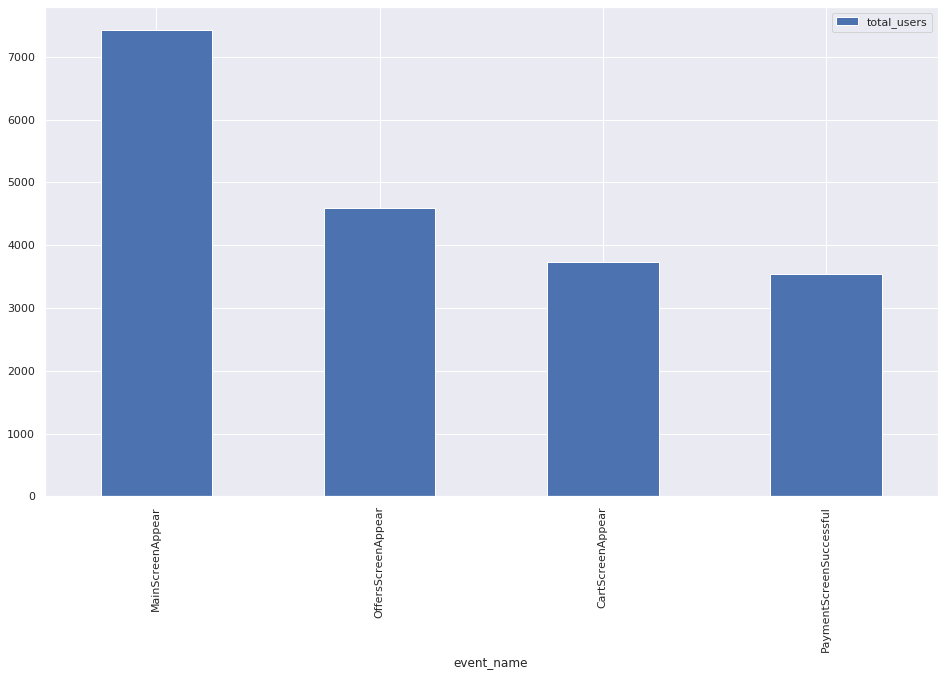

In [31]:
funnel.plot(x='event_name', y = 'total_users', kind = 'bar')

In [32]:
funnel['conversion'] = None
funnel.iloc[0,2] = 1
funnel.iloc[1,2] = funnel.iloc[1,1] / funnel.iloc[0,1] 
funnel.iloc[2,2] = funnel.iloc[2,1] / funnel.iloc[1,1]
funnel.iloc[3,2] = funnel.iloc[3,1] / funnel.iloc[2,1]

In [33]:
funnel

,event_name,total_users,conversion
0,MainScreenAppear,7419,1
1,OffersScreenAppear,4593,0.619086
2,CartScreenAppear,3734,0.812976
3,PaymentScreenSuccessful,3539,0.947777


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
Способ с индексами не очень гибкий, чтобы рассчитать конверсию в шаг, достаточно сдвинуть столбец на одну позицию - ниже пример</div> <br>

In [34]:
funnel\
    .assign(total_users_shift=lambda row: row['total_users'],
            cr=lambda row: row['total_users'] / row['total_users'].shift().fillna(row['total_users'].max()))

,event_name,total_users,conversion,total_users_shift,cr
0,MainScreenAppear,7419,1,7419,1.000000
1,OffersScreenAppear,4593,0.619086,4593,0.619086
2,CartScreenAppear,3734,0.812976,3734,0.812976
3,PaymentScreenSuccessful,3539,0.947777,3539,0.947777


Для получения сдвига используется <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html">метод shift</a>
<hr style="border: 2px solid orange;" />

#### На каком шаге теряете больше всего пользователей?

Больше всего мы теряем пользователей на шаге "Главный экран"

#### Какая доля пользователей доходит от первого события до оплаты?

In [35]:
print('{:.2%} пользователей дошли от первого шага до успешной покупки'.format(funnel.iloc[3,1] / funnel.iloc[0,1]))

47.70% пользователей дошли от первого шага до успешной покупки


### Шаг 5. Изучите результаты эксперимента

#### Сколько пользователей в каждой экспериментальной группе?

In [36]:
users = df_clean.groupby('exp_id')['user_id'].nunique()
users

exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

#### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

Критерии успешного A/A-теста:

Количество пользователей в различных группах различается не более, чем на 1% или 0.5%

Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же

Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости

Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

In [37]:
exp_246 = df_clean[(df_clean['exp_id'] == 246) & (df_clean['event_name'] != 'Tutorial')]
exp_247 = df_clean[(df_clean['exp_id'] == 247) & (df_clean['event_name'] != 'Tutorial')]
exp_248 = df_clean[(df_clean['exp_id'] == 248) & (df_clean['event_name'] != 'Tutorial')]

In [38]:
funnel_246 = exp_246.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index()\
        .rename(columns={'user_id': 'total_users'})
funnel_247 = exp_247.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index()\
        .rename(columns={'user_id': 'total_users'})
funnel_248 = exp_248.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index()\
        .rename(columns={'user_id': 'total_users'})

In [39]:
#funnel_247['total_users'].sum() / funnel_246['total_users'].sum() * 100

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Убрал строчку выше</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Не очень понимаю, что за проверку ты выполняешь в ячейке выше. Но выполнение команды <code>funnel_247['total_users'].sum()</code> - некорректно. Тк пользователи переходят с шага на шаг и 1 пользователь может быть на всех этапах, а ты его считаешь за 4 пользователей при такой сумме </div><br>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍</div> 

In [40]:
funnel_247['total_users'] / funnel_246['total_users'] * 100

0    101.061224
1     98.573281
2     97.788310
3     96.500000
Name: total_users, dtype: float64

Text(0.5, 1.0, '246')

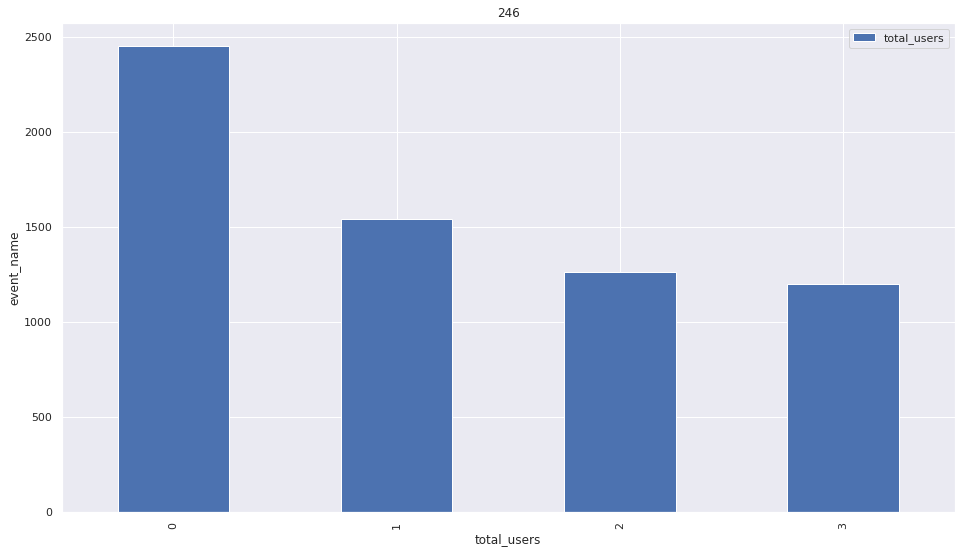

In [41]:
funnel_246.plot(kind='bar')
plt.xlabel('total_users')
plt.ylabel('event_name')
plt.title('246')

Text(0.5, 1.0, '247')

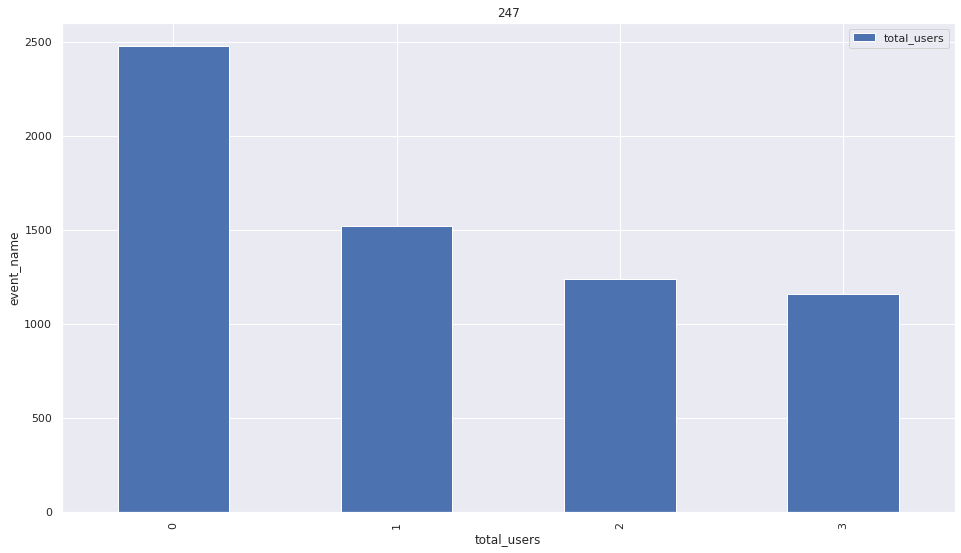

In [42]:
funnel_247.plot(kind='bar')
plt.xlabel('total_users')
plt.ylabel('event_name')
plt.title('247')

Text(0.5, 1.0, '248')

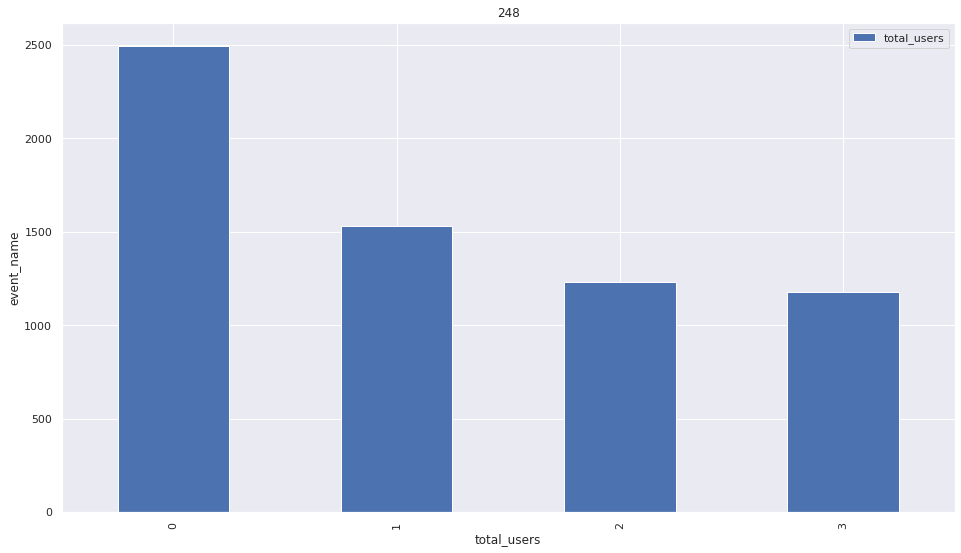

In [43]:
funnel_248.plot(kind='bar')
plt.xlabel('total_users')
plt.ylabel('event_name')
plt.title('248')

In [44]:
df_clean.groupby('user_id')['exp_id'].nunique().reset_index().query('exp_id > 1')
# Пользователей в разных группах нет

,user_id,exp_id


In [45]:
funnel_246

,event_name,total_users
0,MainScreenAppear,2450
1,OffersScreenAppear,1542
2,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200


In [46]:
funnel_247

,event_name,total_users
0,MainScreenAppear,2476
1,OffersScreenAppear,1520
2,CartScreenAppear,1238
3,PaymentScreenSuccessful,1158


In [47]:
funnel_248

,event_name,total_users
0,MainScreenAppear,2493
1,OffersScreenAppear,1531
2,CartScreenAppear,1230
3,PaymentScreenSuccessful,1181


Разницы между группами нет

#### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

In [48]:
all_funnels = df_clean.pivot_table(index='event_name', columns='exp_id',values='user_id',aggfunc='nunique')\
                       .sort_values(246,ascending=False)
all_funnels['246+247'] = all_funnels[246] + all_funnels[247]
all_funnels.drop(['Tutorial'], inplace=True)
all_funnels

exp_id,246,247,248,246+247
event_name,,,,
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
CartScreenAppear,1266,1238,1230,2504
PaymentScreenSuccessful,1200,1158,1181,2358


In [49]:
users = users.to_frame().reset_index()
users.loc[3] = ['246+247', 4997]

In [50]:
users = users.set_index(users.columns[0])
users

,user_id
exp_id,
246,2484
247,2513
248,2537
246+247,4997


Н0: между группами нет различий

Н1: между группами есть различия

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Гипотезы сформулированы верно ✅</div> <br>

In [51]:
def z_test(exp1, exp2, event, alpha): 
    p1_ev = all_funnels.loc[event, exp1]
    p2_ev = all_funnels.loc[event, exp2] 
    p1_us = users.loc[exp1, 'user_id'] 
    p2_us = users.loc[exp2, 'user_id'] 
    p1 = p1_ev / p1_us 
    p2 = p2_ev / p2_us 
    difference = p1 - p2
    p_combined = (p1_ev + p2_ev) / (p1_us + p2_us) 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_us + 1 / p2_us))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Проверка для  {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(exp1, exp2, event, p_value=p_value))
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не удалось отвергнуть нулевую гипотезу")

In [52]:
for event in all_funnels.index:
    z_test(246, 247, event, 0.05)
    print()

Проверка для  246 и 247, событие: MainScreenAppear, p-значение: 0.76
Не удалось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: OffersScreenAppear, p-значение: 0.25
Не удалось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: CartScreenAppear, p-значение: 0.23
Не удалось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: PaymentScreenSuccessful, p-значение: 0.11
Не удалось отвергнуть нулевую гипотезу



Между долями нет различий

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Супер, АА тест корректно, можно двигаться дальше!</div> <br>

#### Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?


In [53]:
for event in all_funnels.index:
    z_test(246, 248, event, 0.05)
    print()

Проверка для  246 и 248, событие: MainScreenAppear, p-значение: 0.29
Не удалось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: OffersScreenAppear, p-значение: 0.21
Не удалось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: CartScreenAppear, p-значение: 0.08
Не удалось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.21
Не удалось отвергнуть нулевую гипотезу



In [54]:
for event in all_funnels.index:
    z_test(247, 248, event, 0.05)
    print()

Проверка для  247 и 248, событие: MainScreenAppear, p-значение: 0.46
Не удалось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: OffersScreenAppear, p-значение: 0.92
Не удалось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: CartScreenAppear, p-значение: 0.58
Не удалось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.74
Не удалось отвергнуть нулевую гипотезу



In [55]:
for event in all_funnels.index:
    z_test('246+247', 248, event, 0.05)
    print()

Проверка для  246+247 и 248, событие: MainScreenAppear, p-значение: 0.29
Не удалось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: OffersScreenAppear, p-значение: 0.43
Не удалось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: CartScreenAppear, p-значение: 0.18
Не удалось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.60
Не удалось отвергнуть нулевую гипотезу



Между долями нет различий

#### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

Критерий в 5%.
4 AA теста и 12 AB тестов.
Воронка намекала, что различий нет.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Раздел проверки гипотез выполнен отлично, проверки корректны, результаты интерпретированы верно!</div> <br>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Отсутствует общий вывод. Общий вывод можно построить следующим образом:
    
- краткий обзор выполненных работ (выполнили, сделали, рассчитали)
- основные выводы (ответы на вопросы поставленные перед проектом)
- рекомендации (если они (рекомендации) возможны)</div><br>

<hr style="border: 2px solid green;" />

## Общий комментарий
Спасибо за проделанную работу🤝

Ержан, проект выполнен очень хорошо, ты отлично разобрался с проверкой данных по АА\АВ тестированию, молодец👌

Не обошлось без доработок:
- корректно применить метод hist или иной другой
- проверить корректность некоторых расчетов
- сформулировать общий вывод


Исправляй и отправляй на проверку🛠

# Вывод

После анализа можно сделать вывод, что у нас быол 243713 событий и 5 типов событий. 
у нас было 7551 пользователей. Мы выявили, что данные являются полными начиная с 1 августа
2019 года. В изучении воронки мы определили 5 событий: MainScreenAppear, OffersScreenAppear,
CartScreenAppear, PaymentScreenSuccessful, Tutorial. Для каждого из этих событий мы выявили 
кол-во пользователей. Были рассчитаны доли пользоватлей, которые переходят 
на следующие этапы. Используя критерии А/А теста было опредлено, что различия между 
группами отсутствуют. Самое популярное событие - MainScreenAppear. Что касается 
шрифта, то различий между пользователями не было. 


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍</div> 